In [16]:
#   PART 1.1

class RBNode:

    def __init__(self, value):
        self.value = value
        self.left = None
        self.right = None
        self.parent = None
        self.colour = "R"

    def get_uncle(self):
        return

    def is_leaf(self):
        return self.left == None and self.right == None

    def is_left_child(self):
        return self == self.parent.left

    def is_right_child(self):
        return not self.is_left_child()

    def is_red(self):
        return self.colour == "R"

    def is_black(self):
        return not self.is_red()

    def make_black(self):
        self.colour = "B"

    def make_red(self):
        self.colour = "R"

    def get_brother(self):
        if self.parent.right == self:
            return self.parent.left
        return self.parent.right

    def get_uncle(self):
        return self.parent.get_brother()

    def uncle_is_black(self):
        if self.get_uncle() == None:
            return True
        return self.get_uncle().is_black()

    def __str__(self):
        return "(" + str(self.value) + "," + self.colour + ")"

    def __repr__(self):
        return "(" + str(self.value) + "," + self.colour + ")"

    def rotate_right(self):
        y = self.left
        self.left = y.right
        if y.right:
            y.right.parent = self
        y.parent = self.parent
        if not self.parent:
            self = y
        elif self == self.parent.left:
            self.parent.left = y
        else:
            self.parent.right = y
        y.right = self
        self.parent = y

    def rotate_left(self):
        y = self.right
        self.right = y.left
        if y.left:
            y.left.parent = self
        y.parent = self.parent
        if not self.parent:
            self = y
        elif self == self.parent.left:
            self.parent.left = y
        else:
            self.parent.right = y
        y.left = self
        self.parent = y

    def fix(self):
        pass
                    
        
    

In [17]:
class RBTree:

    def __init__(self,):
        self.root = None

    def is_empty(self,):
        return self.root == None

    def get_height(self,):
        if self.is_empty():
            return 0
        return self.__get_height(self.root)

    def __get_height(self, node):
        if node == None:
            return 0
        return 1 + max(self.__get_height(node.left), self.__get_height(node.right))

    def insert(self, value):
        new_node = RBNode(value)
        if self.root is None:
            self.root = new_node
            self.root.colour = "B"
        else:
            self._insert(self.root, new_node)
            self.fix(new_node)

    def _insert(self, current_node, new_node):
        if new_node.value < current_node.value:
            if current_node.left is None:
                current_node.left = new_node
                new_node.parent = current_node
            else:
                self._insert(current_node.left, new_node)
        else:
            if current_node.right is None:
                current_node.right = new_node
                new_node.parent = current_node
            else:
                self._insert(current_node.right, new_node)

    def fix(self, x):
        while x != self.root and x.parent.colour == "R":
            if x.parent == x.parent.parent.left:
                y = x.parent.parent.right
                if y and y.colour == "R":
                    x.parent.colour = "B"
                    y.colour = "B"
                    x.parent.parent.colour = "R"
                    x = x.parent.parent
                else:
                    if x == x.parent.right:
                        x = x.parent
                        x.rotate_left()
                    x.parent.colour = "B"
                    x.parent.parent.colour = "R"
                    x.parent.parent.rotate_right()
            else:
                y = x.parent.parent.left
                if y and y.colour == "R":
                    x.parent.colour = "B"
                    y.colour = "B"
                    x.parent.parent.colour = "R"
                    x = x.parent.parent
                else:
                    if x == x.parent.left:
                        x = x.parent
                        x.rotate_right()
                    x.parent.colour = "B"
                    x.parent.parent.colour = "R"
                    x.parent.parent.rotate_left()
        self.root.colour = "B"

    def __str__(self):
        if self.is_empty():
            return "[]"
        return "[" + self.__str_helper(self.root) + "]"

    def __str_helper(self, node):
        if node.is_leaf():
            return "[" + str(node) + "]"
        if node.left == None:
            return "[" + str(node) + " -> " + self.__str_helper(node.right) + "]"
        if node.right == None:
            return "[" +  self.__str_helper(node.left) + " <- " + str(node) + "]"
        return "[" + self.__str_helper(node.left) + " <- " + str(node) + " -> " + self.__str_helper(node.right) + "]"


In [18]:
#test 
def test_red_black_tree():
    # Test results dictionary
    test_results = {
        'root_black': False,
        'red_node_no_red_children': True,  # Assume true until proven otherwise
        'black_node_paths': True  # Assume true until proven otherwise
    }

    # Create a Red-Black tree and insert some values.
    rb_tree = RBTree()
    values_to_insert = [10, 18, 7, 15, 16, 30, 25, 40, 60, 2, 1, 70]
    for value in values_to_insert:
        rb_tree.insert(value)

    # Test if root is black
    test_results['root_black'] = rb_tree.root.colour == "B"

    # Helper function to test if all paths from the root to the leaves contain the same number of black nodes
    def count_black_nodes(node):
        if node is None:
            return 1  # Null nodes are counted as black nodes
        left_black_nodes = count_black_nodes(node.left)
        right_black_nodes = count_black_nodes(node.right)
        if left_black_nodes != right_black_nodes or left_black_nodes == 0:
            test_results['black_node_paths'] = False
            return 0
        return left_black_nodes + (1 if node.colour == 'B' else 0)

    # Helper function to ensure no red node has red children
    def check_red_node_no_red_children(node):
        if node is None:
            return
        if node.colour == 'R':
            if (node.left and node.left.colour == 'R') or (node.right and node.right.colour == 'R'):
                test_results['red_node_no_red_children'] = False
        check_red_node_no_red_children(node.left)
        check_red_node_no_red_children(node.right)

    # Check if all simple paths from root to leaves contain the same number of black nodes
    count_black_nodes(rb_tree.root)

    # Check if no red node has red children
    check_red_node_no_red_children(rb_tree.root)

    # Print test results
    print(f"Test if root is black: {'Passed' if test_results['root_black'] else 'Failed'}")
    print(f"Test if no red node has red children: {'Passed' if test_results['red_node_no_red_children'] else 'Failed'}")
    print(f"Test if all paths from root to leaves contain the same number of black nodes: {'Passed' if test_results['black_node_paths'] else 'Failed'}")

    return test_results

# Run the tests and print the results
test_results = test_red_black_tree()




Test if root is black: Passed
Test if no red node has red children: Passed
Test if all paths from root to leaves contain the same number of black nodes: Passed


In [19]:
# PART 1.2

import matplotlib.pyplot as plt
import random

# Binary Search Tree Implementation
class BSTNode:
    def __init__(self, value):
        self.value = value
        self.left = None
        self.right = None

class BSTTree:
    def __init__(self):
        self.root = None

    def insert(self, value):
        if not self.root:
            self.root = BSTNode(value)
            return
        
        current_node = self.root
        while current_node:
            if value < current_node.value:
                if not current_node.left:
                    current_node.left = BSTNode(value)
                    break
                else:
                    current_node = current_node.left
            else:
                if not current_node.right:
                    current_node.right = BSTNode(value)
                    break
                else:
                    current_node = current_node.right


Average BST Height: 30.12
Average RBT Height: 13.86


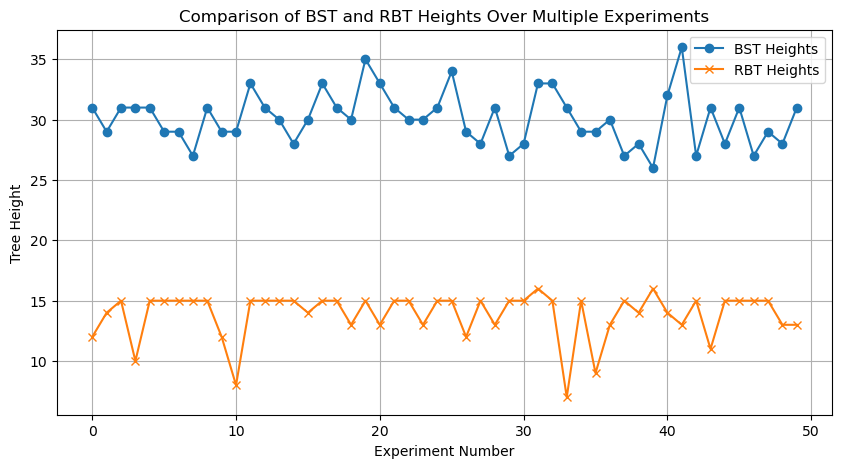

In [22]:
def generate_random_list(size):
    return [random.randint(0, 100000) for _ in range(size)]

def get_tree_height(root):
    if not root:
        return -1  # If the tree is empty, its height is -1.
    
    # Stack for nodes to visit, storing (node, depth) pairs.
    stack = [(root, 0)]
    max_height = 0
    
    # Iteratively visit nodes in a depth-first manner.
    while stack:
        node, depth = stack.pop()
        max_height = max(max_height, depth)
        
        # Add child nodes to the stack with increased depth.
        if node.left:
            stack.append((node.left, depth + 1))
        if node.right:
            stack.append((node.right, depth + 1))
    
    return max_height


def create_and_measure_trees(values):
    bst = BSTTree()
    rbt = RBTree()
    
    for value in values:
        bst.insert(value)  # Insert into BST
        rbt.insert(value)  # Insert into RBT

    bst_height = get_tree_height(bst.root)
    rbt_height = get_tree_height(rbt.root)
    
    return bst_height, rbt_height

def experiment(number_of_runs):
    bst_heights = []
    rbt_heights = []
    
    for _ in range(number_of_runs):
        random_values = generate_random_list(10000)
        bst_height, rbt_height = create_and_measure_trees(random_values)
        bst_heights.append(bst_height)
        rbt_heights.append(rbt_height)
    
    # Calculate and print the average heights
    avg_bst_height = sum(bst_heights) / number_of_runs
    avg_rbt_height = sum(rbt_heights) / number_of_runs
    print(f"Average BST Height: {avg_bst_height}")
    print(f"Average RBT Height: {avg_rbt_height}")
    
    # Plot the results
    plt.figure(figsize=(10, 5))
    plt.plot(bst_heights, label='BST Heights', marker='o')
    plt.plot(rbt_heights, label='RBT Heights', marker='x')
    plt.xlabel('Experiment Number')
    plt.ylabel('Tree Height')
    plt.title('Comparison of BST and RBT Heights Over Multiple Experiments')
    plt.legend()
    plt.grid(True)
    plt.show()

    return avg_bst_height, avg_rbt_height


average_bst_height, average_rbt_height = experiment(50)



### Experiment:

The experiment conducted here involved generating random lists of 10,000 elements and constructing both Binary Search Trees (BSTs) and Red-Black Trees (RBTs) using these lists. The aim was to compare the average heights of the two types of trees across multiple trials to deduce any computational advantages one might have over the other. The graph produced from the experiment illustrates the heights of both trees over 50 separate trials.

### Observation:

From the graph, we can observe that the RBTs consistently maintain a lower height compared to the BSTs. This height difference is significant for several reasons:

1. **Search Time Complexity**: The height of a tree directly correlates with the worst-case time complexity for search operations. A lower height means that the maximum number of comparisons needed to find an element (or conclude it is not in the tree) is reduced, which results in faster search times. For a perfectly balanced binary tree, this time complexity is O(log n), while for a skewed binary tree, it can degrade to O(n).

2. **Insertion and Deletion Operations**: Similar to search operations, insertions and deletions are also quicker in a tree with a lower height. RBTs are designed to maintain balance after each insertion or deletion, keeping the height low.

3. **Memory Overhead**: While RBTs might require extra storage for maintaining the color property of each node, the reduction in height can lead to less memory usage overall in some cases, since fewer pointer references are required to structure the tree.

### Reflection:

Reflecting on the difference in height, it's clear that the RBT offers a more consistent performance irrespective of the input data due to its self-balancing properties. This can be particularly leveraged in scenarios where the dataset is large and not necessarily ordered, as the RBT will ensure that the tree remains balanced, thus providing better average performance for all tree operations.

Selecting between RBTs and BSTs would depend on the application:

- If the dataset is known to be mostly sorted or the tree will not be subjected to many insertions or deletions after its initial creation, a BST might suffice.
- For datasets that are random, subject to frequent updates, or where the performance of search, insertion, or deletion operations is critical, an RBT would be the preferable choice.

In summary, the height difference highlighted by the experiment underscores the benefit of RBTs in terms of efficiency and performance, making them a suitable data structure choice for ensuring fast and reliable operations in various computational scenarios.

### 1.3 (Nupur)

In [ ]:
#create a perfect sorted list(loops) of random length. DONE
# create near sorted list of different degrees
#create experiment for both and compare height. get_tree_height is the function to work on
#bst for all the lists. rbt too
#height of the trees
#repeat for different sorted vals

[0, 2, 4, 6, 8, 10, 12, 14, 16, 18]
[123.5, 72.5, 80.5, 78.5, 79.5, 67.5, 49.5, 45.5, 60.5, 54.5]


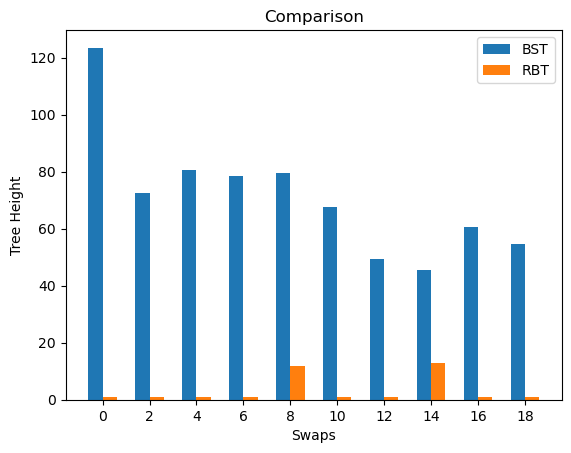

In [70]:
def create_sorted_list(len):
    l = []
    for i in range(1,len+1):
        l.append(i)
        
    return l

def create_near_sorted_list(l,swaps):
    cp = l[:]
    for _ in range(swaps):
        i,j = random.sample(range(len(cp)),2)
        cp[i],cp[j] = cp[j],cp[i]
    return cp

#l = [1,2,3,4,5]
#print(create_near_sorted_list(l,2))

runs = 50
swaps =[]
for i in range(0,20,2):
    swaps.append(i)
    
print(swaps)

slistres = [] #bst
nslistres = [] #rbt

for x in swaps:
    #2 swaps
    ht1 = [] #bst
    ht2 = [] #rbt

    

    bstree = BSTTree()
    rbtree = RBTree()

    for _ in range(runs):
        
        slist1 = create_sorted_list(100)
        nslist1 = create_near_sorted_list(slist1,x)
        
        for i in nslist1:
            bstree.insert(i)
            rbtree.insert(i)
            
        ht1.append(get_tree_height(bstree.root))
        ht2.append(get_tree_height(rbtree.root))


    bst_avg = sum(ht1) / runs
    rbt_avg = sum(ht2) / runs
    slistres.append(bst_avg)
    nslistres.append(rbt_avg)


print(slistres)

plt.bar([x - 0.3 for x in swaps] , slistres, width=0.6, label='BST')
plt.bar([x + 0.3 for x in swaps], nslistres, width=0.6, label='RBT')
plt.xlabel('Swaps')
plt.ylabel('Tree Height')
plt.title('Comparison')
plt.xticks(swaps)
plt.legend()
plt.show()


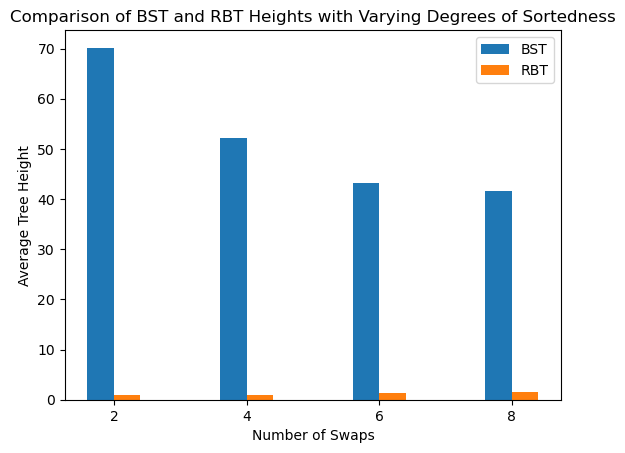

In [58]:
# Define the number of runs
runs = 50

# Define the number of swaps for each scenario
swap_values = [2, 4, 6, 8]

# Lists to store average heights for BST and RBT
bst_heights = []
rbt_heights = []

for swaps in swap_values:
    bst_avg_height = 0
    rbt_avg_height = 0

    for _ in range(runs):
        slist1 = create_sorted_list(100)
        nslist1 = create_near_sorted_list(slist1, swaps)

        bst_tree = BSTTree()
        rbt_tree = RBTree()

        for num in nslist1:
            bst_tree.insert(num)
            rbt_tree.insert(num)

        bst_avg_height += get_tree_height(bst_tree.root)
        rbt_avg_height += get_tree_height(rbt_tree.root)

    bst_avg_height /= runs
    rbt_avg_height /= runs

    bst_heights.append(bst_avg_height)
    rbt_heights.append(rbt_avg_height)

# Plotting the results
plt.bar([x - 0.2 for x in swap_values], bst_heights, width=0.4, label='BST')
plt.bar([x + 0.2 for x in swap_values], rbt_heights, width=0.4, label='RBT')
plt.xlabel('Number of Swaps')
plt.ylabel('Average Tree Height')
plt.title('Comparison of BST and RBT Heights with Varying Degrees of Sortedness')
plt.xticks(swap_values)
plt.legend()
plt.show()